In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import os
import json
import datetime

plt.rcParams["figure.figsize"] = (20, 5)

In [2]:
model_name = "GEMM_STREAM"

In [3]:
gpa_analysis = pd.read_csv("analysis/{}_gpa_analysis.csv".format(model_name))
rip_analysis = pd.read_csv("analysis/{}_rip_analysis.csv".format(model_name))

In [4]:
gpa_analysis

,threshold,p,p',n/p ratio,ratio',upper limit for train/val accuracy,accuracy'
0,0,1124931,0,6.899855,6.899855,0.000000,0.000000
1,1,259767,865164,29.880089,22.980234,0.111464,0.111464
2,2,145266,114501,53.432056,23.551967,0.140967,0.029503
3,3,101228,44038,76.677016,23.244961,0.157988,0.017021
4,4,77236,23992,100.495378,23.818362,0.170352,0.012364
5,5,61748,15488,125.702225,25.206847,0.180329,0.009977
6,6,50455,11293,153.837301,28.135075,0.189059,0.008730
7,7,41906,8549,185.220756,31.383455,0.196769,0.007710
8,8,35364,6542,219.484815,34.264059,0.203511,0.006743
9,9,30289,5075,256.260061,36.775246,0.209396,0.005885


In [5]:
rip_analysis

,threshold,p,p',n/p ratio,ratio',upper limit for train/val accuracy,accuracy'
0,0,63512,0,122.210937,122.210937,0.000000,0.000000
1,1,17507,46005,443.357571,321.146635,0.005927,0.005927
2,2,10521,6986,737.749358,294.391787,0.007727,0.001800
3,3,7823,2698,992.184712,254.435353,0.008770,0.001043
4,4,6343,1480,1223.689264,231.504552,0.009533,0.000763
5,5,5360,983,1448.108396,224.419132,0.010166,0.000633
6,6,4661,699,1665.278052,217.169656,0.010706,0.000540
7,7,4174,487,1859.573790,194.295738,0.011146,0.000439
8,8,3800,374,2042.595000,183.021210,0.011531,0.000385
9,9,3490,310,2224.028940,181.433940,0.011890,0.000359


In [34]:
def analysis_visualize(df):
    fig, ax_1 = plt.subplots()

    ax_1.set_xlabel("threshold")
    ax_1.set_xticks(df["threshold"])

    # target_1 = "p"
    # target_1 = "p'"
    target_1 = "ratio'"
    target_2 = "upper limit for train/val accuracy"
    # target_2 = "accuracy'"
    
    color_1 = 'tab:red'
    ax_1.set_ylabel(target_1, color=color_1)
    ax_1.plot(df["threshold"], df[target_1], "o-", color=color_1)
    ax_1.tick_params(axis='y', labelcolor=color_1)
    #ax_1.vlines(df["threshold"], 0, df["p"], color=color_1, linestyles="dashed")

    ax_2 = ax_1.twinx()     # instantiate a second axes that shares the same x-axis

    color_2 = 'tab:blue'
    ax_2.set_ylabel(target_2, color=color_2)
    ax_2.plot(df["threshold"], df[target_2], "o-", color=color_2)
    ax_2.tick_params(axis='y', labelcolor=color_2)

    #ax_2.text(df["threshold"], str(df["upper limit for train/val accuracy"]), "b+")

    plt.show()

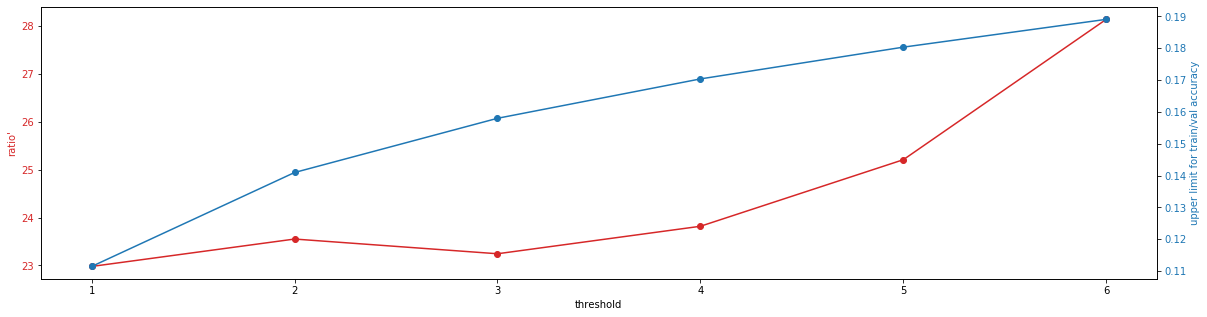

In [35]:
analysis_visualize(gpa_analysis[1:7])

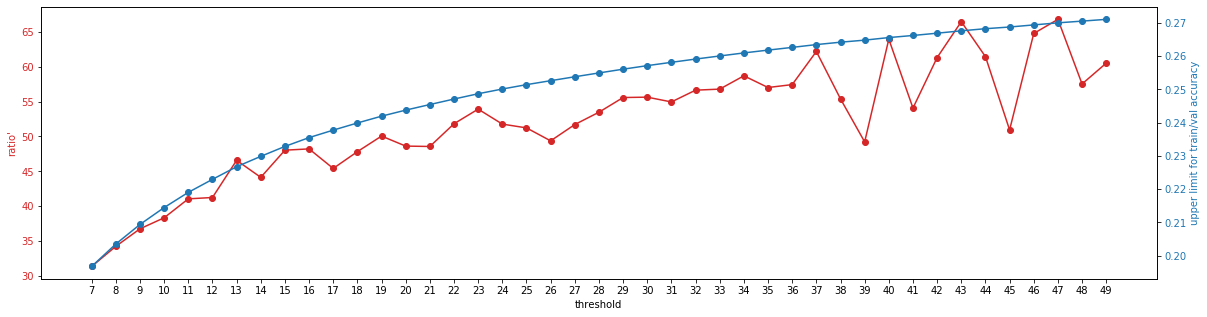

In [36]:
analysis_visualize(gpa_analysis[7:])

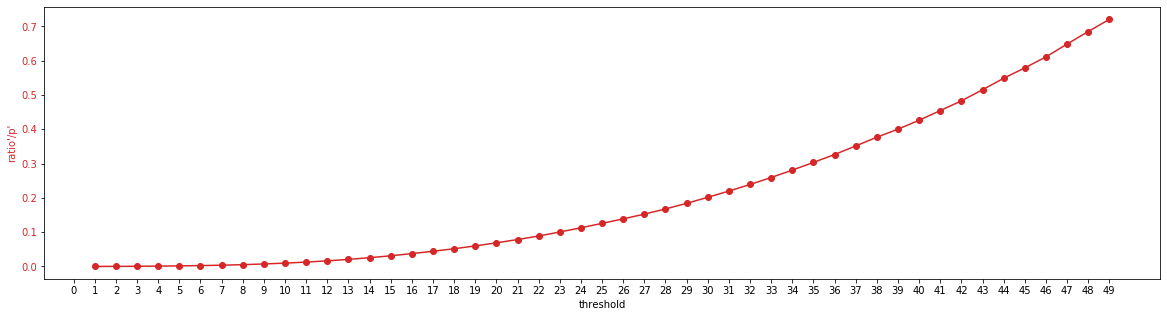

In [9]:
fig, ax_1 = plt.subplots()

ax_1.set_xlabel("threshold")
ax_1.set_xticks(gpa_analysis["threshold"])

color_1 = 'tab:red'
ax_1.set_ylabel("ratio'/p'", color=color_1)
ax_1.plot(gpa_analysis["threshold"][1:], (gpa_analysis["ratio'"]/gpa_analysis["p'"])[1:], "o-", color=color_1)
ax_1.tick_params(axis='y', labelcolor=color_1)
plt.show()

In [31]:
derivatives = []
t = gpa_analysis["ratio'"]/gpa_analysis["p'"]
for i in range(50):
    if i == 0:
        previous_derivates = 0
        derivatives.append(0)
        continue
    derivatives.append(t[i] - previous_derivates)
    previous_derivates = t[i]
derivatives = pd.DataFrame(derivatives, columns=["ratio derivatives"], index=[i for i in range(1, 51)])

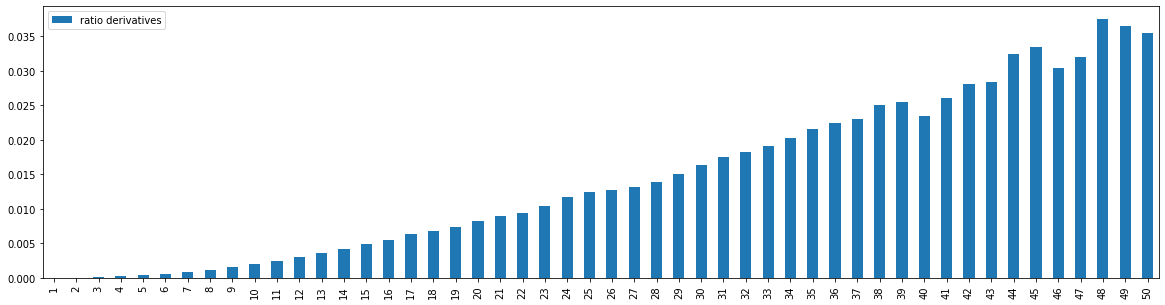

In [32]:
derivatives.plot(kind="bar")